In [30]:
from school_analysis.preprocessing.load import Loader
import pandas as pd

loader = Loader()
melted_df = loader.load('students_with_special_educational_support')


df_male = melted_df[['male', 'year']].rename(columns={'male': 'total'})
df_female = melted_df[['female', 'year']].rename(columns={'female': 'total'})
df_male['Gender'] = 'm'
df_female['Gender'] = 'f'
melted_df = pd.concat([df_male, df_female], ignore_index=True)



melted_df['year'] = pd.to_datetime(melted_df['year'], format='%Y')
melted_df['total'] = pd.to_numeric(melted_df['total'], errors='coerce')
total_over_years = melted_df.groupby(['year','Gender'])['total'].sum()

children_state = loader.load('school-children-by-state')
children_state = children_state.rename(columns={'Year': 'year'})
children_state['year'] = pd.to_datetime(children_state['year'], format='%Y')
child_amount_per_year = children_state.groupby(['year','Gender'])['Value'].sum()

merged_df = pd.merge(total_over_years, child_amount_per_year, on=['year', 'Gender'])
merged_df['relative'] = merged_df['total']/merged_df['Value'] 
merged_df


total      Value  relative
year       Gender                               
2014-01-01 f       167642.0  4853073.0  0.034543
           m       310073.0  5070739.0  0.061149
2015-01-01 f       168673.0  4835457.0  0.034883
           m       314321.0  5059340.0  0.062127
2016-01-01 f       169385.0  4835388.0  0.035030
           m       317295.0  5086665.0  0.062378
2017-01-01 f       172441.0  4820315.0  0.035774
           m       323239.0  5063817.0  0.063833
2018-01-01 f       189390.0  4815770.0  0.039327
           m       352158.0  5043835.0  0.069819
2019-01-01 f       195231.0  4794552.0  0.040719
           m       361827.0  5015718.0  0.072139
2020-01-01 f       199926.0  4847820.0  0.041240
           m       368784.0  5050959.0  0.073013
2021-01-01 f       203970.0  4890770.0  0.041705
           m       372968.0  5085538.0  0.073339
2022-01-01 f       207065.0  4661963.0  0.044416
           m       375638.0  4844931.0  0.077532

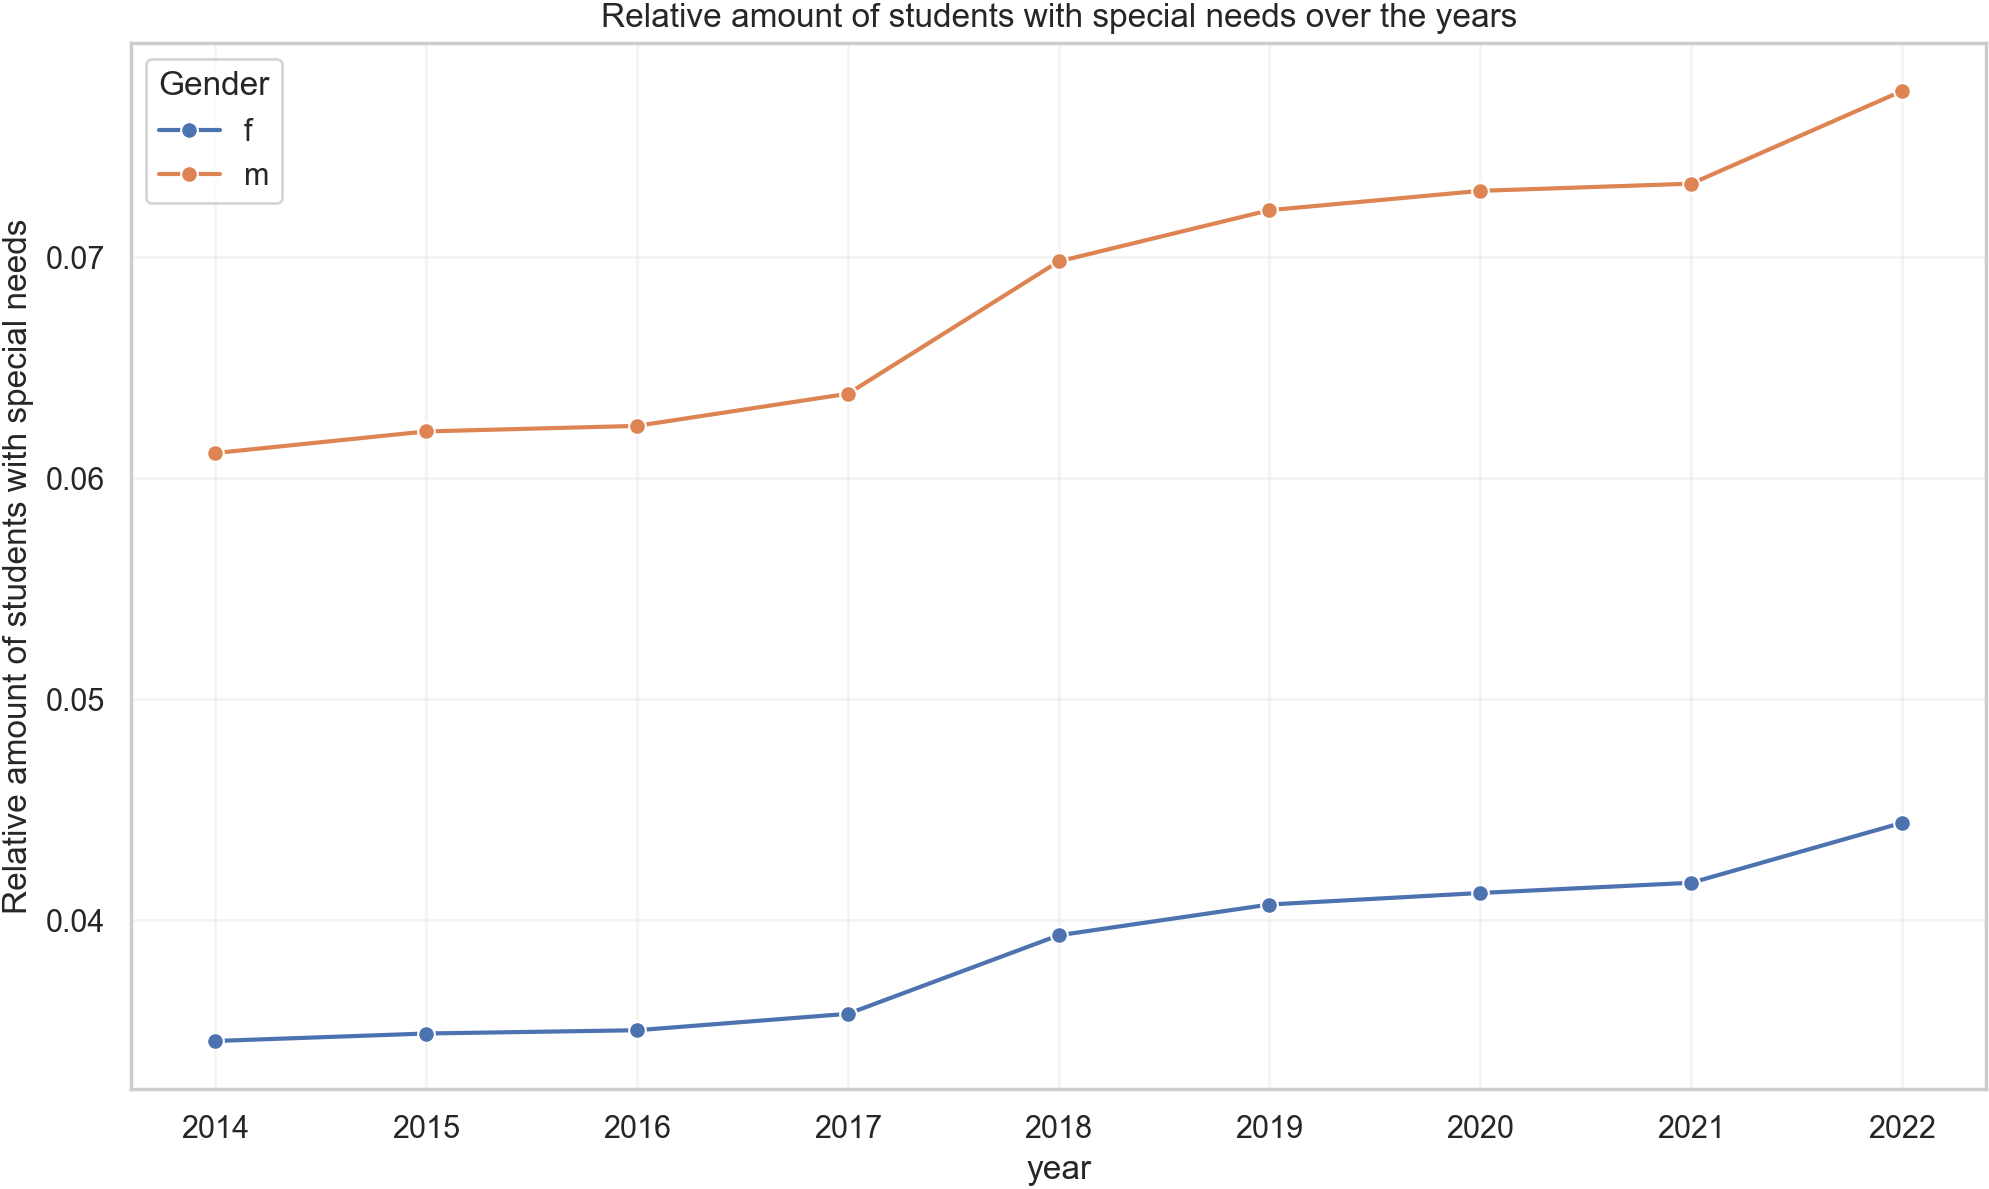

In [36]:
import matplotlib.pyplot as plt

import pandas as pd

from io import BytesIO

import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

lineplot = sns.lineplot(data=merged_df, x='year', y='relative', hue='Gender', marker='o')

plt.title('Relative amount of students with special needs over the years')

plt.xlabel('year')

plt.ylabel('Relative amount of students with special needs')


plt.show()